In [20]:
import sys 
sys.path.append('../../')

In [21]:
import Helpers.helpers as helpers

plain_df = helpers.load_dataset('../export/plain.csv')
plain_df.head()

X         Y
0  0.914339  4.550146
1 -1.930380  2.702150
2  1.872718  4.180692
3 -0.555524  4.695958
4 -1.034436  8.259404

In [22]:
from sklearn.cluster import DBSCAN, AffinityPropagation, KMeans

epsilons = [0.05, 0.1 , 0.5 , 1, 2, 3, 5, 7, 9]

def models(): 
    return {
        'KMeans': KMeans(n_clusters=4, init='random', algorithm='lloyd'),
    }

In [23]:
from Helpers.helpers import generate_external_validity_export

supported_models = list(models().values())

gaussian_report = generate_external_validity_export(epsilons, supported_models, n_times = 10, import_path='../export/', perturbed_path='../export/gaussian/')
laplace_report = generate_external_validity_export(epsilons, supported_models, n_times = 10, import_path='../export/', perturbed_path='../export/laplace/')
pairwise_report = generate_external_validity_export(epsilons, supported_models, n_times = 10, import_path='../export/', perturbed_path='../export/pairwise/')
ndlaplace_report = generate_external_validity_export(epsilons, supported_models, n_times = 10, import_path='../export/', perturbed_path='../export/')

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xffff61668280>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xffff61668280>
Traceback 

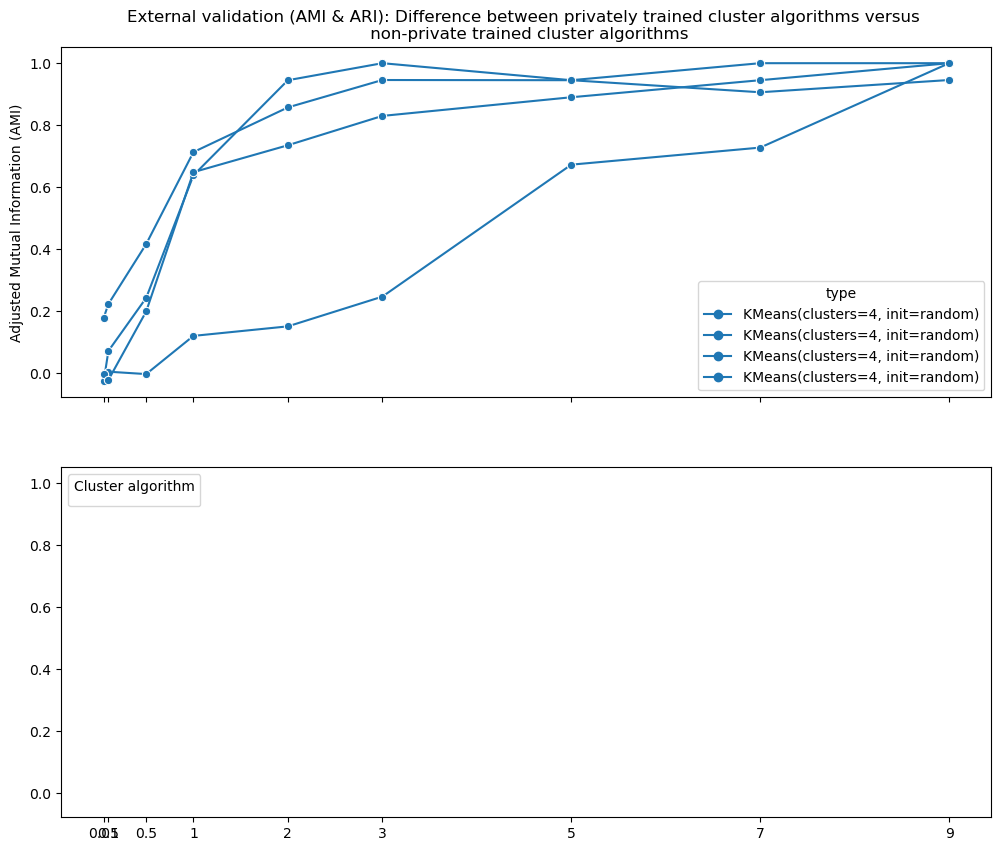

In [25]:
from matplotlib import pyplot as plt

from Helpers.helpers import plot_utility

fig, axs = plt.subplots(2, sharex=True, sharey=True, figsize=(12, 10))

plot_utility(laplace_report, epsilons, 'ami', axes=axs[0])
plot_utility(gaussian_report, epsilons, 'ami', axes=axs[0])
plot_utility(pairwise_report, epsilons, 'ami', axes=axs[0])
plot_utility(ndlaplace_report, epsilons, 'ami', axes=axs[0])

plt.show()